In [27]:
import numpy as np
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as tck

In [2]:
# connect to the SQL server database
conn = pyodbc.connect(
    '''
    DRIVER={ODBC Driver 17 for SQL Server};
    SERVER=DESKTOP-7CB1RAA;
    DATABASE=master;
    Trusted_Connection=yes;
    '''
    )

# create a cursor to fetch data
cursor = conn.cursor()

### a) Top 10 products sales

In [3]:
query1 = """
select p.Name, COUNT(s.ProductID) as prodCount 
from [CompanyX].[Sales].[SalesOrderDetail] as s
inner join [CompanyX].[Production].[Product] as p
	on s.ProductID = p.ProductID
group by p.Name
order by prodCount desc
"""

cursor.execute(query1)
result = cursor.fetchall()
newRes1 = pd.DataFrame(np.asarray(result), columns=['Product','Count'])
# cast the read data from string to float => More easy to plot
newRes1['Count'] = newRes1['Count'].astype(float)
# pd.to_numeric(newRes1['Count'], downcast='integer')

product = newRes1['Product'].head(10)
count = newRes1['Count'].head(10)

print(type(count[0]))


<class 'numpy.float64'>


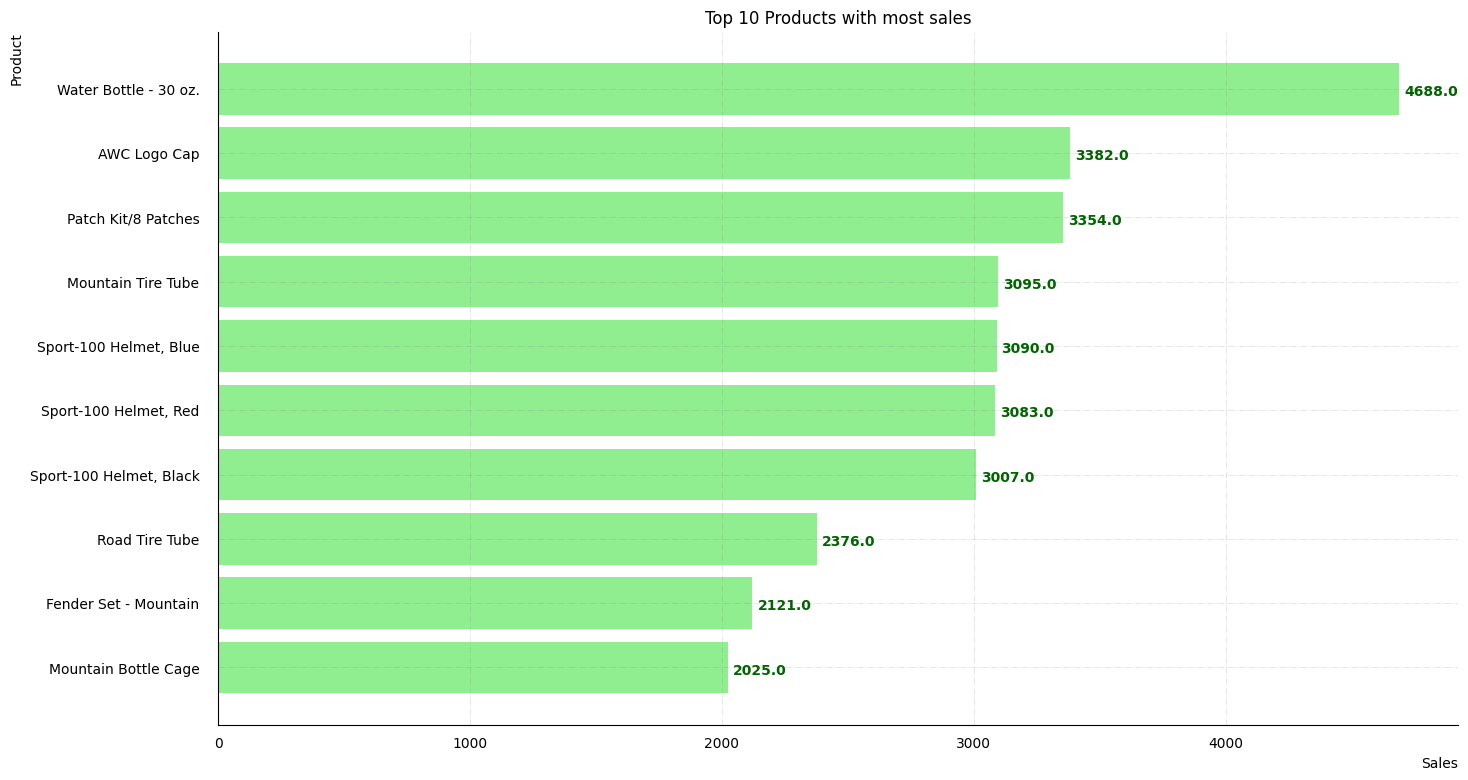

In [4]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
bars =  ax.barh(product, count, color='lightgreen')

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',linestyle ='-.', linewidth = 0.7,alpha = 0.2)

# Show top values 
ax.invert_yaxis()

# plt.xlabel('Sales')
# plt.ylabel('Product')
ax.set_ylabel('Product', loc='top')
ax.set_xlabel('Sales', loc='right')
ax.set_title("Top 10 Products with most sales")

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+20, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='darkgreen')

# Show Plot
plt.show()


### b) Which geographic regions generate the most sales?

In [5]:
query2 = """
select 
	concat(st.Name, ',',' ', st.CountryRegionCode) as region,
	sum(sd.LineTotal) as totalSales
from [CompanyX].[Sales].[SalesTerritory] as st
inner join [CompanyX].[Sales].[SalesOrderHeader] as sh
	on st.TerritoryID = sh.TerritoryID
inner join [CompanyX].[Sales].[SalesOrderDetail] as sd
	on sh.SalesOrderID = sd.SalesOrderID
group by concat(st.Name, ',',' ', st.CountryRegionCode)
order by totalSales desc
"""

cursor.execute(query2)
result = cursor.fetchall()
newRes2 = pd.DataFrame(np.asarray(result), columns=['Region','Sales'])
newRes2['Sales'] = newRes2['Sales'].astype(float)
# pd.to_numeric(newRes1['Count'], downcast='integer')


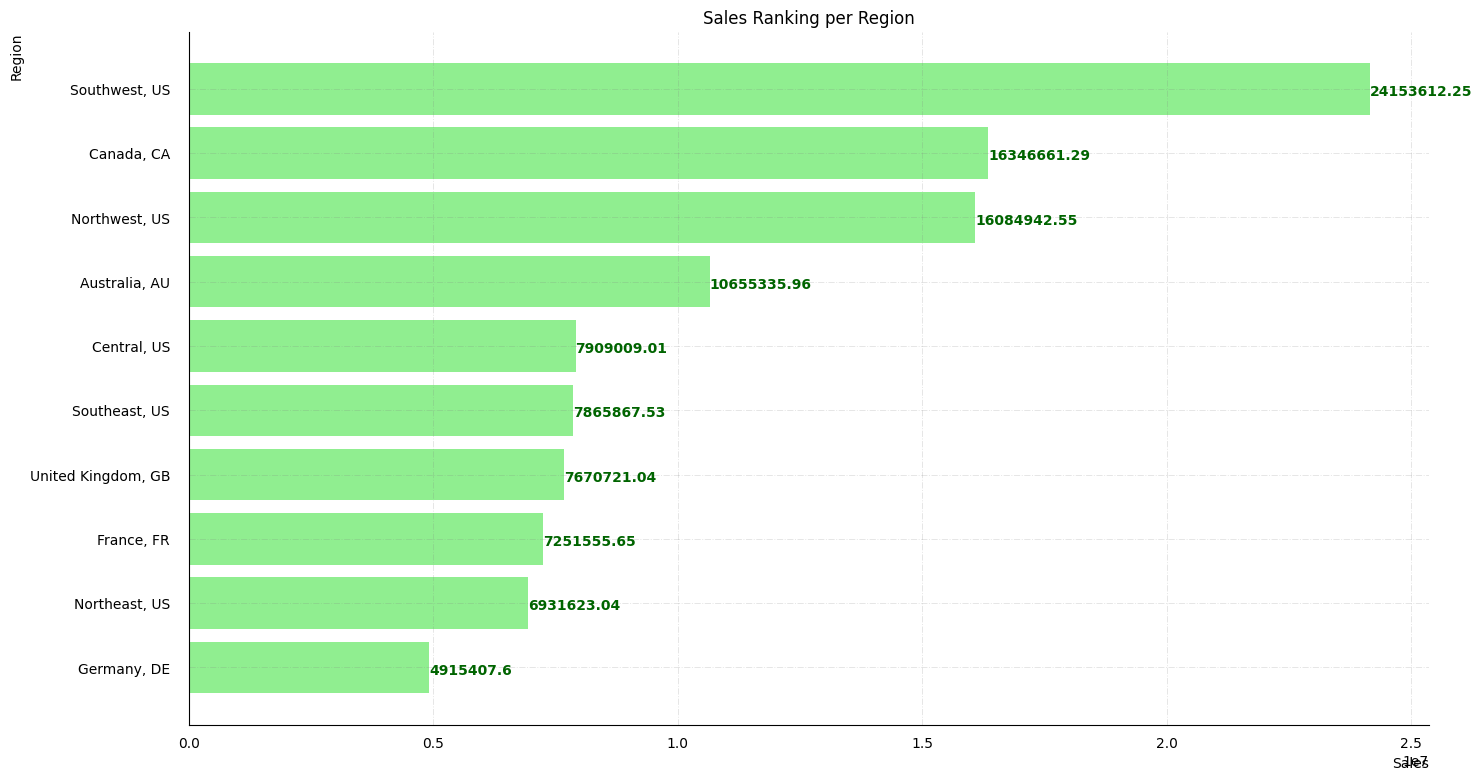

In [6]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
bars =  ax.barh(newRes2['Region'], newRes2['Sales'], color='lightgreen')

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',linestyle ='-.', linewidth = 0.7,alpha = 0.2)

# Show top values 
ax.invert_yaxis()

ax.set_ylabel('Region', loc='top')
ax.set_xlabel('Sales', loc='right')
ax.set_title("Sales Ranking per Region")

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+20, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='darkgreen')

# Show Plot
plt.show()

### c) Sales trend over time ?

In [13]:
query3 = '''
select 
	concat(YEAR(OrderDate), '-', MONTH(OrderDate)) as month_year,
	sum(LineTotal) as totalSales
from [CompanyX].[Sales].[SalesOrderDetail] sd
inner join [CompanyX].[Sales].[SalesOrderHeader] as sh
	on sd.SalesOrderID = sh.SalesOrderID
group by concat(YEAR(OrderDate), '-', MONTH(OrderDate))
order by concat(YEAR(OrderDate), '-', MONTH(OrderDate))
'''

cursor.execute(query3)
result = cursor.fetchall()
newRes3 = pd.DataFrame(np.asarray(result), columns=['Time','Money'])
# newRes3['Money'] = newRes3['Money'].astype(float).round(2)
newRes3['Money'] = newRes3['Money'].astype(int)
display(newRes3)

,Time,Money
0,2011-10,4588761
1,2011-11,737839
2,2011-12,1309863
3,2011-5,442160
4,2011-6,458910
5,2011-7,2044600
6,2011-8,2495816
7,2011-9,502073
8,2012-1,3970627
9,2012-10,2544091


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14900\1156148466.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(newRes3['Time'],rotation=90)


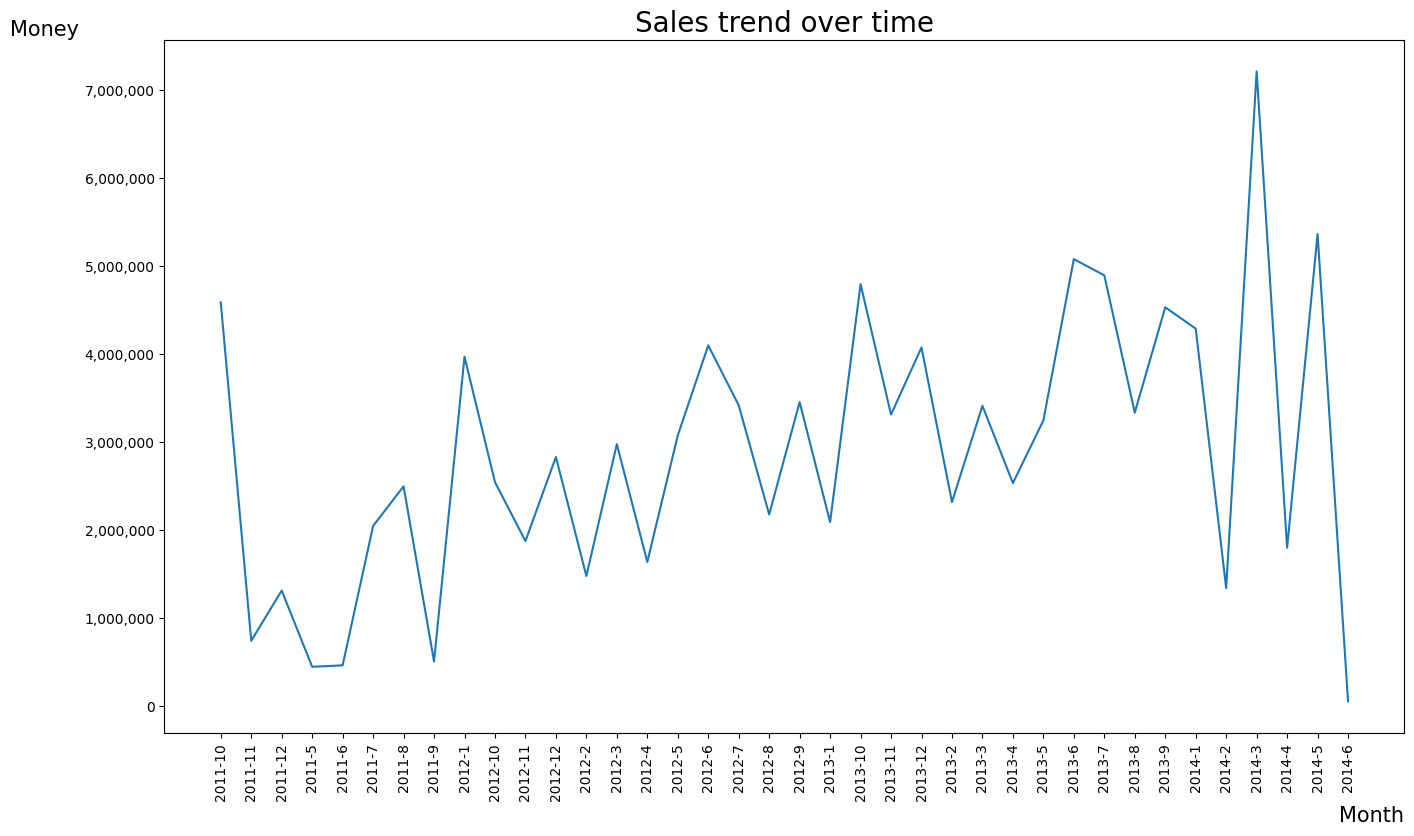

In [37]:
fig, ax = plt.subplots(figsize =(16, 9))

ax.plot(newRes3['Time'],newRes3['Money'])

ax.set_ylabel('Money', loc='top', rotation=0, fontsize=15)
ax.set_xlabel('Month', loc='right', fontsize=15)
ax.set_title("Sales trend over time", fontsize=20)
ax.set_xticklabels(newRes3['Time'],rotation=90)
ax.get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))

# ax.xaxis.axis_date()


plt.show()